In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import math
import scipy.optimize as op
import sklearn
from sklearn import metrics

In [2]:
def sigmoid(z):
    g = 1.0/(1+np.exp(-z))
    return g

In [3]:
def ComputeCost(theta, x, y):
    m = len(x)
    n = len(x[0])
    theta = theta.reshape(n,1)
    h = sigmoid(x.dot(theta))
    #h.reshape(m,1)
    one_minus_y_df = 1-y
    J = -(1.0/m)*(np.transpose(y).dot(np.log(h)) + np.transpose(one_minus_y_df).dot(np.log(1-h)))
    return J

In [4]:
def ComputeGradient(theta, x, y):
    m = len(x)
    n = len(x[0])
    theta = theta.reshape(n,1)
    h = sigmoid(x.dot(theta))
    #h.reshape(m,1)
    grad = (1.0/m)*np.transpose(x).dot(h-y)
    return grad.flatten()

In [5]:
def GradientDescent(theta, x, y, alpha, num_iter):
    # Capture cost with iteration
    J_list = []
    m = len(x)
    n = len(x[0])
    theta = theta.reshape(n,1)
    for i in range(0,num_iter):
        J = ComputeCost(theta, x, y)
        grad = ComputeGradient(theta, x, y)
        grad = grad.reshape(n,1)
        theta = theta - (alpha/m)*grad
        J_list.append(J)    
    return theta, J_list

In [6]:
#import data into lists
filepath = '..ex2/ex2data1.txt'
x1_in = []
x2_in = []
y_in = []
f = open(filepath)
for line in f:
    data = line.split(',')
    x1_in.append(float(data[0]))
    x2_in.append(float(data[1]))
    y_in.append(int(data[2]))
#convert from list to array. Add 1's to x matrix
x1 = np.asarray(x1_in)
x2 = np.asarray(x2_in)
y = np.asarray(y_in)
ones_x = np.ones_like(x1) + 0.0
x = np.transpose([ones_x, x1, x2])
#Number of features (n) and data points (m)
m = len(x)
n = len(x[0])
y = y.reshape(m,1)

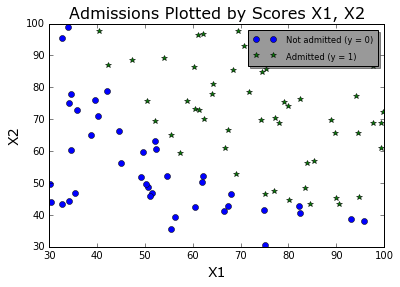

In [7]:
#plot data y=0 as 'o' and y=1 as '*'
y_0 = plt.plot(x[np.where(y==0)[0],1],x[np.where(y==0)[0],2],'o',label = 'Not admitted (y = 0)')
y_1 = plt.plot(x[np.where(y==1)[0],1],x[np.where(y==1)[0],2],'*', label = 'Admitted (y = 1)')
#axes
axis_font = {'fontname':'Verdana', 'size':'14'}
title_font = {'fontname': 'Verdana', 'size': '16'}
plt.xlabel('X1', **axis_font)
plt.ylabel('X2', **axis_font)
#title
plt.title('Admissions Plotted by Scores X1, X2', **title_font)
#legend
legend = plt.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.60')
for label in legend.get_texts():
    label.set_fontsize('small')
plt.show()

In [8]:
# Use BFGS Optimizer to Compute Theta. ComputeCost is the cost function to be minimized and ComputeGradient gives the
#value of the gradient at any given value of theta. theta is a 1D array
#note that gradient descent is very slow to converge, hence use of an optimizer becomes necessary
#initialize theta
theta = np.ones((n,1), float)
theta = theta.flatten()
calc_theta = op.fmin_bfgs(ComputeCost, theta, fprime = ComputeGradient, args = (x, y), maxiter = 2000, full_output=True)
theta_final = calc_theta[0].reshape(n,1)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 26
         Function evaluations: 67
         Gradient evaluations: 67


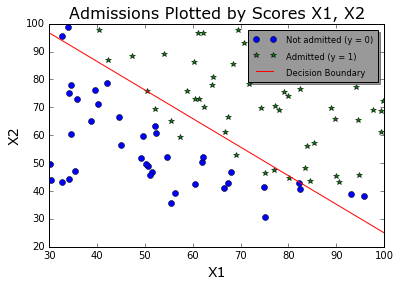

In [9]:
#plot original data alongside decision boundary
#plot data y=0 as 'o' and y=1 as '*'
y_0 = plt.plot(x[np.where(y==0)[0],1],x[np.where(y==0)[0],2],'o',label = 'Not admitted (y = 0)')
y_1 = plt.plot(x[np.where(y==1)[0],1],x[np.where(y==1)[0],2],'*', label = 'Admitted (y = 1)')

#plot decision boundary (line defined by x*theta = 0.5 assuming that above 0.5, y=1 and below 0.5, y = 0)
x1_pred = np.linspace(30, 100, 3)
x2_pred = -(- 0.5 + theta_final.flatten()[0] + theta_final.flatten()[1]*x1_pred)/theta_final.flatten()[2]
boundary = plt.plot(x1_pred, x2_pred, label = 'Decision Boundary')

#axes
axis_font = {'fontname':'Verdana', 'size':'14'}
title_font = {'fontname': 'Verdana', 'size': '16'}
plt.xlabel('X1', **axis_font)
plt.ylabel('X2', **axis_font)
#title
plt.title('Admissions Plotted by Scores X1, X2', **title_font)
#legend
legend = plt.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.60')
for label in legend.get_texts():
    label.set_fontsize('small')
plt.show()

In [10]:
#Predict and Calculate F1
# predict using y = sigmoid(X.theta)
y_pred = sigmoid(x.dot(theta_final))
#Setting all values > 0.5 to 1 and below 0.5 to 0
y_pred = np.round(y_pred)
#F1 score
F1 = sklearn.metrics.f1_score(y, y_pred)
print "F1 Score on Training Set: ", F1

F1 Score on Training Set:  0.909090909091
